In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Загружаем png

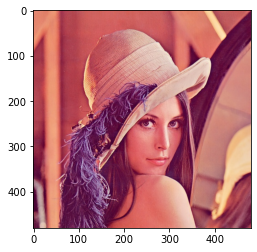

In [2]:
img = cv2.imread("C:\Photo1.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Алгоритм обнаружения лица

In [3]:
path = 'D:\\anaconda\\pkgs\\libopencv-4.0.1-hbb9e17c_0\\Library\\etc\\haarcascades\\haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(path)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face = face_cascade.detectMultiScale(gray_image, 1.1, 5)
face.shape

(1, 4)

Выберем элемет картинки с лицом

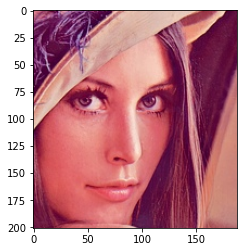

In [4]:
face_image = img[face[0][2]:face[0][0] + face[0][3], face[0][0]:face[0][0] + face[0][1]] 

plt.imshow(cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB))

Алгоритм Кенни

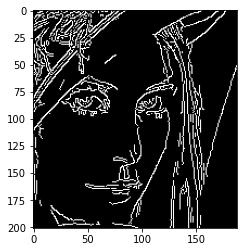

In [5]:
gray_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
bounds = cv2.Canny(gray_image, 100, 200)

plt.imshow(bounds,cmap="gray")

Удаление мелких границ(ширина и длина < 10 )

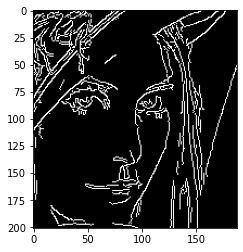

In [6]:
w, h = bounds.shape

numLabels, labels, stats, centroids = cv2.connectedComponentsWithStats(bounds, 4)
for x in range(0, w):
    for y in range(0, h):
        if stats[labels[x, y], cv2.CC_STAT_WIDTH] < 10 and stats[labels[x, y], cv2.CC_STAT_HEIGHT] < 10:
            bounds[x, y] = 0
            
plt.imshow(bounds, cmap="gray")

Увеличиваем границы 

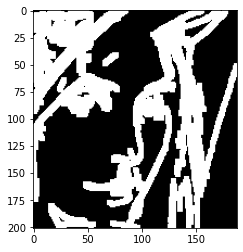

In [7]:
kernel = np.ones((5, 5), dtype=np.uint8)
dilated = cv2.dilate(bounds, kernel, 1)

plt.imshow(dilated,cmap="gray")

Фильтр Гаусса и нормализация изображения(пикселы от 0 до 1)

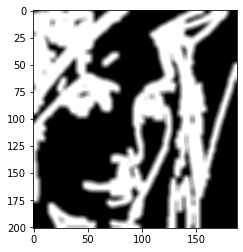

In [8]:
array = np.array([])
gb = cv2.GaussianBlur(dilated, (5,5), cv2.BORDER_DEFAULT)
M = cv2.normalize(gb, array, 0, 1, cv2.NORM_MINMAX, cv2.CV_32F)

plt.imshow(M, cmap="gray")

Билатеральный фильтр

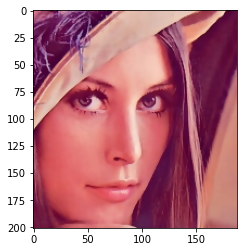

In [9]:
F1 = cv2.bilateralFilter(face_image, 5, 50, 100)

plt.imshow(cv2.cvtColor(F1, cv2.COLOR_BGR2RGB))

Повышаем контрастность

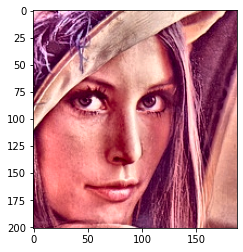

In [13]:
lab = cv2.cvtColor(face_image, cv2.COLOR_BGR2LAB)  
l, a, b = cv2.split(lab)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl = clahe.apply(l)
limg = cv2.merge((cl,a,b))
F2 = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
plt.imshow(cv2.cvtColor(F2, cv2.COLOR_BGR2RGB))

Объединенный фильтр

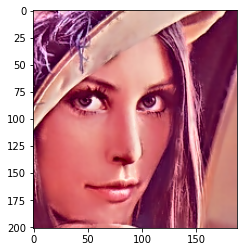

In [15]:
result = np.zeros(face_image.shape, dtype=np.uint8)
w, h, channel = result.shape

for x in range(0, w):
    for y in range(0, h):
        for c in range(0, channel):
            result[x, y, c] = M[x, y] * F2[x, y, c] + (1 - M[x, y]) * F1[x, y, c]
            
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))